# COMPSCI-589 HW3: Random Forest

name: Harry (Haochen) Wang

In [1]:
from evaluationmatrix import *
from utils import *
from decisiontree import *
from randomforest import *
from run import *

In [16]:
housedata, housecategory = importhousedata()
winedata, winecategory = importwinedata()
cancerdata, cancercategory = importcancerdata()
cmcdata,cmccategory = importcmcdata()

parameterofn = [1, 5, 10, 20, 30, 40, 50]  # n of ntrees

def ploter(data, title, xlabel, ylabel, n = parameterofn):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    plt.title(title)
    plt.plot(n,data)
    plt.show()

### I. Wine Dataset

In [ ]:
wineaccuracy, wineprecision, winerecall, winef1 = [], [], [], []
for n in parameterofn:
    lists = kfoldcrossvalid(winedata, winecategory, 10, n, 10, 10, 0.01, 'id3', 0.1)[0]
    beta = 1
    acc0, pre0, rec0, fsc0 = meanevaluation(lists, 1, beta)
    acc1, pre1, rec1, fsc1 = meanevaluation(lists, 2, beta)
    acc2, pre2, rec2, fsc2 = meanevaluation(lists, 3, beta)
    acc, pre, rec, fsc = (acc0+acc1+acc2)/3, (pre0+pre1+pre2)/3, (rec0+rec1+rec2)/3, (fsc0+fsc1+fsc2)/3
    wineaccuracy.append(acc)
    wineprecision.append(pre)
    winerecall.append(rec)
    winef1.append(fsc)
    markdownaprf(acc, pre, rec, fsc, beta, n, 'Wine with information gain')

Result/Stat of 1 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.927 | 0.92 | 0.891 | 0.894 |

Result/Stat of 5 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.974 | 0.969 | 0.957 | 0.96 |

Result/Stat of 10 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.974 | 0.967 | 0.963 | 0.962 |

Result/Stat of 20 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.977 | 0.973 | 0.969 | 0.967 |

Result/Stat of 30 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.977 | 0.97 | 0.968 | 0.967 |

Result/Stat of 40 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.981 | 0.976 | 0.975 | 0.973 |

Result/Stat of 50 trees random forest of Wine with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.981 | 0.974 | 0.975 | 0.972 |

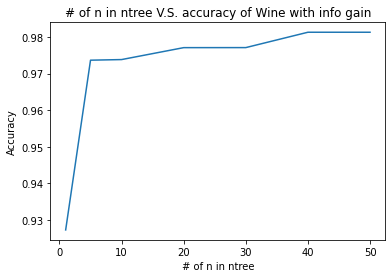

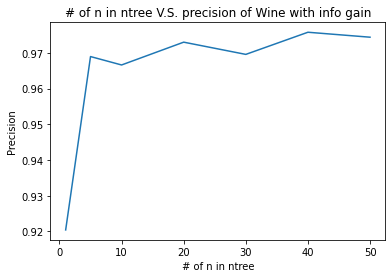

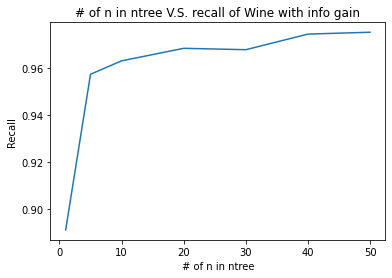

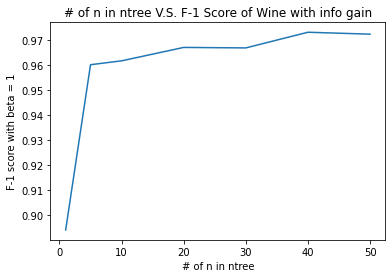

In [23]:
ploter(wineaccuracy, '# of n in ntree V.S. accuracy of Wine with info gain', '# of n in ntree', 'Accuracy')
ploter(wineprecision, '# of n in ntree V.S. precision of Wine with info gain', '# of n in ntree', 'Precision')
ploter(winerecall, '# of n in ntree V.S. recall of Wine with info gain', '# of n in ntree', 'Recall')
ploter(winef1, '# of n in ntree V.S. F-1 Score of Wine with info gain', '# of n in ntree', 'F-1 score with beta = 1')

### II. 1984 US Congressional Voting Dataset

In [33]:
houseaccuracy, houseprecision, houserecall, housef1 = [], [], [], []
for n in parameterofn:
    lists = kfoldcrossvalid(housedata, housecategory, 10, n, 10, 5, 0.01, 'id3', 0.1)[0]
    beta = 1
    acc0, pre0, rec0, fsc0 = meanevaluation(lists, 0, beta)
    acc1, pre1, rec1, fsc1 = meanevaluation(lists, 1, beta)
    acc, pre, rec, fsc = (acc0+acc1)/2, (pre0+pre1)/2, (rec0+rec1)/2, (fsc0+fsc1)/2
    houseaccuracy.append(acc)
    houseprecision.append(pre)
    houserecall.append(rec)
    housef1.append(fsc)
    markdownaprf(acc, pre, rec, fsc, beta, n, 'House with information gain')


	Result/Stat of 1 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.931 | 0.933 | 0.926 | 0.927 |
    


	Result/Stat of 5 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.954 | 0.955 | 0.952 | 0.952 |
    


	Result/Stat of 10 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.956 | 0.956 | 0.955 | 0.954 |
    


	Result/Stat of 20 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.952 | 0.951 | 0.951 | 0.949 |
    


	Result/Stat of 30 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.965 | 0.966 | 0.964 | 0.963 |
    


	Result/Stat of 40 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.961 | 0.959 | 0.961 | 0.959 |
    


	Result/Stat of 50 trees random forest of House with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.956 | 0.955 | 0.955 | 0.954 |
    

Result/Stat of 1 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.904 | 0.905 | 0.896 | 0.898 |

Result/Stat of 5 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.947 | 0.948 | 0.942 | 0.943 |

Result/Stat of 10 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.961 | 0.959 | 0.962 | 0.959 |

Result/Stat of 20 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.961 | 0.96 | 0.96 | 0.958 |

Result/Stat of 30 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.961 | 0.96 | 0.961 | 0.959 |

Result/Stat of 40 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.954 | 0.952 | 0.954 | 0.952 |

Result/Stat of 50 trees random forest of House with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.961 | 0.96 | 0.959 | 0.959 |

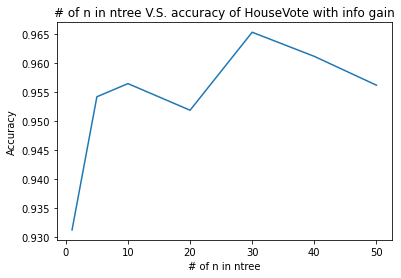

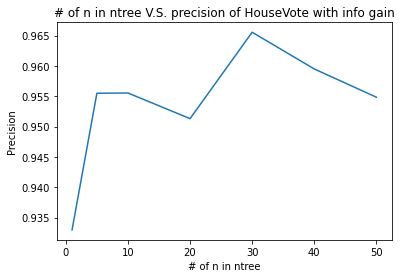

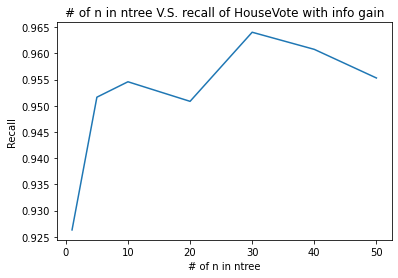

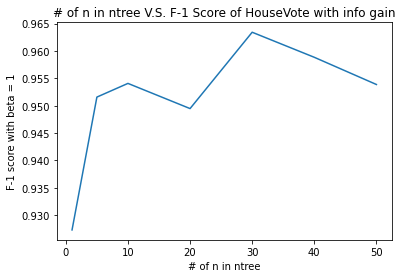

In [34]:
ploter(houseaccuracy, '# of n in ntree V.S. accuracy of HouseVote with info gain', '# of n in ntree', 'Accuracy')
ploter(houseprecision, '# of n in ntree V.S. precision of HouseVote with info gain', '# of n in ntree', 'Precision')
ploter(houserecall, '# of n in ntree V.S. recall of HouseVote with info gain', '# of n in ntree', 'Recall')
ploter(housef1, '# of n in ntree V.S. F-1 Score of HouseVote with info gain', '# of n in ntree', 'F-1 score with beta = 1')

### III. Extra Points

#### (Extra Points #1: 6 Points) 
Reconstruct the same graphs as above, but now using the Gini criterion. You should present the same analyses and graphs mentioned above. Discuss whether (and how) different performance metrics were affected (positively or negatively) by changing the splitting criterion, and explain why you think that was the case.

In [ ]:
wineaccuracygini, wineprecisiongini, winerecallgini, winef1gini = [], [], [], []
for n in parameterofn:
    lists = kfoldcrossvalid(winedata, winecategory, 10, n, 10, 10, 0.01, 'gini', 0.1)[0]
    beta = 1
    acc0, pre0, rec0, fsc0 = meanevaluation(lists, 1, beta)
    acc1, pre1, rec1, fsc1 = meanevaluation(lists, 2, beta)
    acc2, pre2, rec2, fsc2 = meanevaluation(lists, 3, beta)
    acc, pre, rec, fsc = (acc0+acc1+acc2)/3, (pre0+pre1+pre2)/3, (rec0+rec1+rec2)/3, (fsc0+fsc1+fsc2)/3
    wineaccuracygini.append(acc)
    wineprecisiongini.append(pre)
    winerecallgini.append(rec)
    winef1gini.append(fsc)
    markdownaprf(acc, pre, rec, fsc, beta, n, 'Wine with Gini index')

Result/Stat of 1 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.93 | 0.917 | 0.89 | 0.893 |

Result/Stat of 5 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.962 | 0.955 | 0.942 | 0.944 |

Result/Stat of 10 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.977 | 0.969 | 0.969 | 0.966 |

Result/Stat of 20 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.985 | 0.98 | 0.98 | 0.978 |

Result/Stat of 30 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.977 | 0.972 | 0.969 | 0.967 |

Result/Stat of 40 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.98 | 0.973 | 0.973 | 0.97 |

Result/Stat of 50 trees random forest of Wine with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.989 | 0.984 | 0.985 | 0.983 |

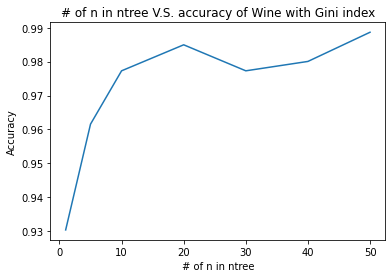

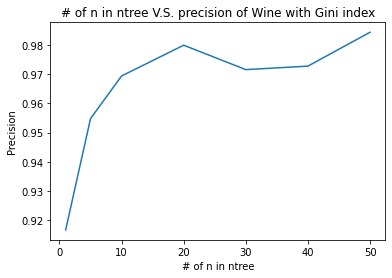

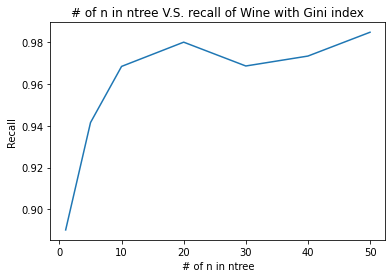

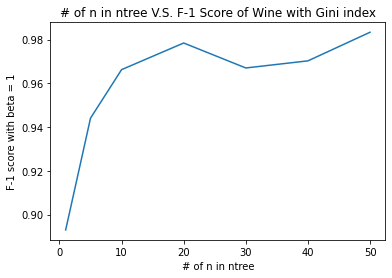

In [35]:
ploter(wineaccuracygini, '# of n in ntree V.S. accuracy of Wine with Gini index', '# of n in ntree', 'Accuracy')
ploter(wineprecisiongini, '# of n in ntree V.S. precision of Wine with Gini index', '# of n in ntree', 'Precision')
ploter(winerecallgini, '# of n in ntree V.S. recall of Wine with Gini index', '# of n in ntree', 'Recall')
ploter(winef1gini, '# of n in ntree V.S. F-1 Score of Wine with Gini index', '# of n in ntree', 'F-1 score with beta = 1')

In [ ]:
houseaccuracygini, houseprecisiongini, houserecallgini, housef1gini = [], [], [], []
for n in parameterofn:
    lists = kfoldcrossvalid(housedata, housecategory, 10, n, 10, 10, 0.01, 'gini', 0.1)[0]
    beta = 1
    acc0, pre0, rec0, fsc0 = meanevaluation(lists, 0, beta)
    acc1, pre1, rec1, fsc1 = meanevaluation(lists, 1, beta)
    acc, pre, rec, fsc = (acc0+acc1)/2, (pre0+pre1)/2, (rec0+rec1)/2, (fsc0+fsc1)/2
    houseaccuracygini.append(acc)
    houseprecisiongini.append(pre)
    houserecallgini.append(rec)
    housef1gini.append(fsc)
    markdownaprf(acc, pre, rec, fsc, beta, n, 'House with Gini index')

Result/Stat of 1 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.947 | 0.948 | 0.946 | 0.944 |

Result/Stat of 5 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.945 | 0.945 | 0.942 | 0.941 |

Result/Stat of 10 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.968 | 0.966 | 0.967 | 0.966 |

Result/Stat of 20 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.952 | 0.949 | 0.951 | 0.949 |

Result/Stat of 30 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.959 | 0.957 | 0.959 | 0.957 |

Result/Stat of 40 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.954 | 0.954 | 0.954 | 0.952 |

Result/Stat of 50 trees random forest of House with Gini index:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.954 | 0.95 | 0.954 | 0.951 |

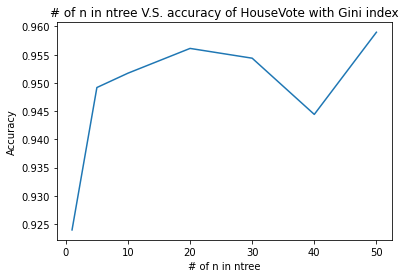

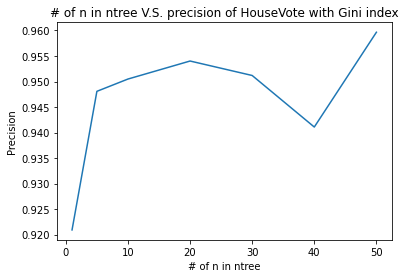

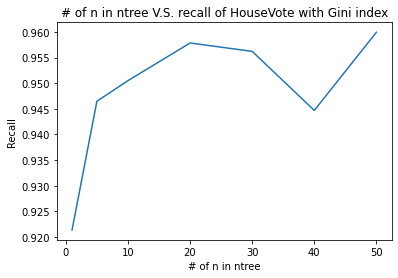

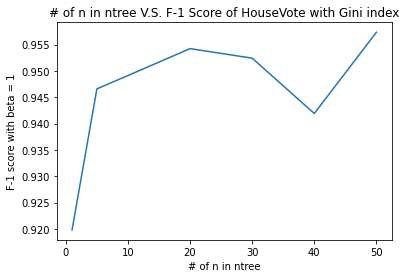

In [44]:
ploter(houseaccuracygini, '# of n in ntree V.S. accuracy of HouseVote with Gini index', '# of n in ntree', 'Accuracy')
ploter(houseprecisiongini, '# of n in ntree V.S. precision of HouseVote with Gini index', '# of n in ntree', 'Precision')
ploter(houserecallgini, '# of n in ntree V.S. recall of HouseVote with Gini index', '# of n in ntree', 'Recall')
ploter(housef1gini, '# of n in ntree V.S. F-1 Score of HouseVote with Gini index', '# of n in ntree', 'F-1 score with beta = 1')

#### (Extra Points #2: 6 Points) 
Analyze a third dataset: the Breast Cancer Dataset. The goal, here, is to classify whether tissue removed via a biopsy indicates whether a person may or may not have breast cancer. There are 699 instances in this dataset. Each instance is described by 9 numerical attributes, and there are 2 classes. You should present the same analyses and graphs as discussed above. This dataset can be found in the same zip file as the two main datasets.


In [ ]:
canceraccuracy, cancerprecision, cancerrecall, cancerf1 = [], [], [], []
for n in parameterofn:
    lists = kfoldcrossvalid(cancerdata, cancercategory, 10, n, 10, 10, 0.01, 'id3', 0.1)[0]
    beta = 1
    acc, pre, rec, fsc = meanevaluation(lists, 1, beta)
    canceraccuracy.append(acc)
    cancerprecision.append(pre)
    cancerrecall.append(rec)
    cancerf1.append(fsc)
    markdownaprf(acc, pre, rec, fsc, beta, n, 'Cancer with information gain')

Result/Stat of 1 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.937 | 0.896 | 0.929 | 0.911 |

Result/Stat of 5 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.951 | 0.928 | 0.934 | 0.93 |

Result/Stat of 10 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.964 | 0.945 | 0.954 | 0.948 |

Result/Stat of 20 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.967 | 0.942 | 0.967 | 0.953 |

Result/Stat of 30 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.969 | 0.937 | 0.975 | 0.955 |

Result/Stat of 40 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.969 | 0.936 | 0.979 | 0.956 |

Result/Stat of 50 trees random forest of Cancer with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.962 | 0.932 | 0.963 | 0.946 |

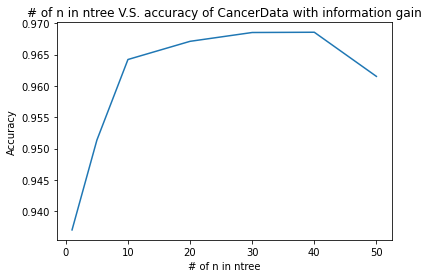

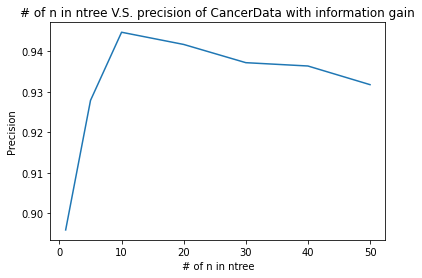

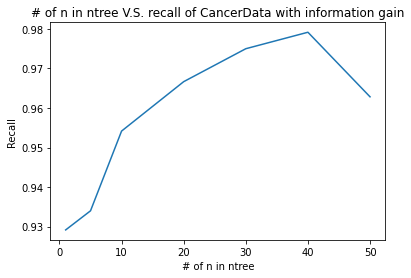

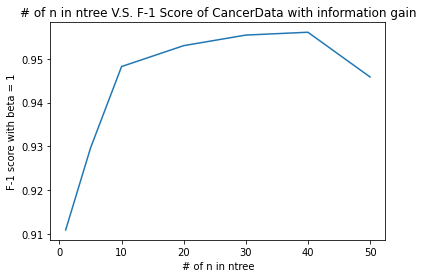

In [45]:
ploter(canceraccuracy, '# of n in ntree V.S. accuracy of CancerData with information gain', '# of n in ntree', 'Accuracy')
ploter(cancerprecision, '# of n in ntree V.S. precision of CancerData with information gain', '# of n in ntree', 'Precision')
ploter(cancerrecall, '# of n in ntree V.S. recall of CancerData with information gain', '# of n in ntree', 'Recall')
ploter(cancerf1, '# of n in ntree V.S. F-1 Score of CancerData with information gain', '# of n in ntree', 'F-1 score with beta = 1')

#### (Extra Points #3: 12 Points) 
Analyze a fourth, more challenging dataset: the Contraceptive Method Choice Dataset. The goal, here, is to predict the type of contraceptive method used by a person based on many attributes describing that person. This dataset is more challenging because it combines both numerical and categorical attributes. There are 1473 instances in this dataset. Each instance is described by 9 attributes, and there are 3 classes. The dataset can be downloaded here. You should present the same analyses and graphs discussed above.

In [8]:
cmcaccuracy, cmcprecision, cmcrecall, cmcf1 = [], [], [], []
for n in parameterofn:
    lists,accu = kfoldcrossvalid(cmcdata, cmccategory, 10, n, 5, 10, 0.01, 'id3', 0.1)
    beta = 1
    acc0, pre0, rec0, fsc0 = meanevaluation(lists, 1, beta)
    acc1, pre1, rec1, fsc1 = meanevaluation(lists, 2, beta)
    acc2, pre2, rec2, fsc2 = meanevaluation(lists, 3, beta)
    acc, pre, rec, fsc = (acc0+acc1+acc2)/3, (pre0+pre1+pre2)/3, (rec0+rec1+rec2)/3, (fsc0+fsc1+fsc2)/3
    cmcaccuracy.append(accu)
    cmcprecision.append(pre)
    cmcrecall.append(rec)
    cmcf1.append(fsc)
    markdownaprf(accu, pre, rec, fsc, beta, n, 'CMC with information gain')


	Result/Stat of 1 trees random forest of CMC with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.496 | 0.488 | 0.485 | 0.476 |
    


	Result/Stat of 5 trees random forest of CMC with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.5 | 0.483 | 0.484 | 0.477 |
    


	Result/Stat of 10 trees random forest of CMC with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.504 | 0.486 | 0.483 | 0.48 |
    


	Result/Stat of 20 trees random forest of CMC with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.519 | 0.499 | 0.495 | 0.492 |
    


	Result/Stat of 30 trees random forest of CMC with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.521 | 0.501 | 0.496 | 0.494 |
    


	Result/Stat of 40 trees random forest of CMC with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.513 | 0.49 | 0.487 | 0.484 |
    


	Result/Stat of 50 trees random forest of CMC with information gain:
    | **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
    | :---: | :---: | :---: | :---: |
    |0.52 | 0.5 | 0.497 | 0.494 |
    

Result/Stat of 1 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.496 | 0.488 | 0.485 | 0.476 |

Result/Stat of 5 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.5 | 0.483 | 0.484 | 0.477 |

Result/Stat of 10 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.504 | 0.486 | 0.483 | 0.48 |

Result/Stat of 20 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.519 | 0.499 | 0.495 | 0.492 |

Result/Stat of 30 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.521 | 0.501 | 0.496 | 0.494 |

Result/Stat of 40 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.513 | 0.49 | 0.487 | 0.484 |

Result/Stat of 50 trees random forest of CMC with information gain:
| **Accuracy** | **Precision** | **Recall** | **F-Score, Beta=1** |
| :---: | :---: | :---: | :---: |
|0.52 | 0.5 | 0.497 | 0.494 |

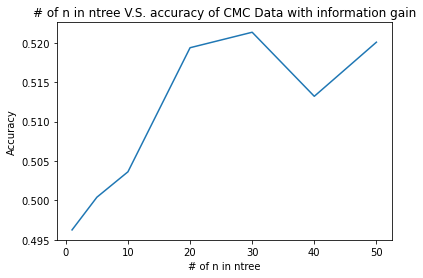

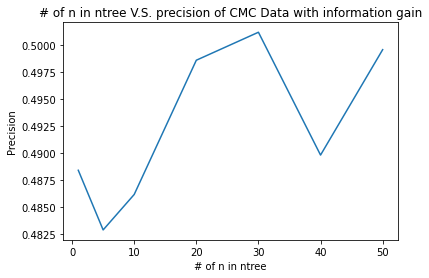

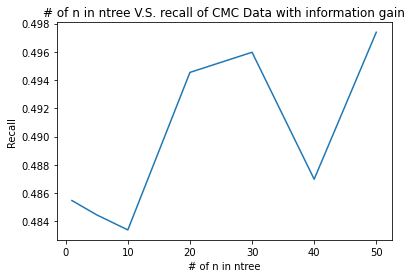

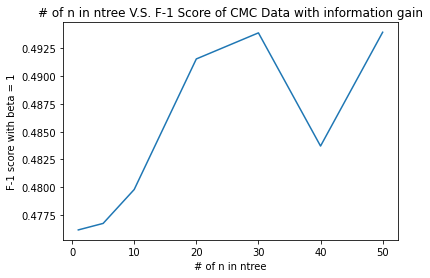

In [46]:
ploter(cmcaccuracy, '# of n in ntree V.S. accuracy of CMC Data with information gain', '# of n in ntree', 'Accuracy')
ploter(cmcprecision, '# of n in ntree V.S. precision of CMC Data with information gain', '# of n in ntree', 'Precision')
ploter(cmcrecall, '# of n in ntree V.S. recall of CMC Data with information gain', '# of n in ntree', 'Recall')
ploter(cmcf1, '# of n in ntree V.S. F-1 Score of CMC Data with information gain', '# of n in ntree', 'F-1 score with beta = 1')

### IV. Appendix: Code